In [126]:
# pip install openpyxl

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import scipy.stats as stats
import statsmodels.stats.api as sms

In [128]:
df = pd.read_excel('us_state_naics_detailedsizes_2021.xlsx', header=2)
df

,State,State Name,NAICS,NAICS Description,Enterprise Size,Firms,Establishments,Employment,Employment Noise Flag,"Annual Payroll\n($1,000)",Annual Payroll Noise Flag
0,0,United States,--,Total,01: Total,6294604,8148606,128346299,G,8278573947,G
1,0,United States,--,Total,02: <5 employees,4009508,4019061,6178498,G,344920532,G
2,0,United States,--,Total,03: 5-9 employees,1021829,1036956,6726092,G,301779028,G
3,0,United States,--,Total,04:10-14 employees,416449,434500,4871406,G,225820376,G
4,0,United States,--,Total,05: 15-19 employees,220092,237179,3687664,G,174922894,G
...,...,...,...,...,...,...,...,...,...,...,...
67404,56,Wyoming,99,Industries not classified,01: Total,78,78,153,H,5387,G
67405,56,Wyoming,99,Industries not classified,02: <5 employees,70,70,69,G,2287,H
67406,56,Wyoming,99,Industries not classified,03: 5-9 employees,6,6,46,H,1900,H
67407,56,Wyoming,99,Industries not classified,06: <20 employees,78,78,153,H,5387,G


In [129]:
total_comp = df[(df['NAICS Description'] == 'Total') & (df['State Name'] != 'United States')]
comp_num = total_comp.groupby('State Name')['Establishments'].sum()
comp_num

State Name
Alabama                  353946
Alaska                    77598
Arizona                  539751
Arkansas                 237603
California              3614650
Colorado                 645582
Connecticut              310086
Delaware                 100115
District of Columbia      81097
Florida                 2227843
Georgia                  890713
Hawaii                   114256
Idaho                    198419
Illinois                1137957
Indiana                  516310
Iowa                     290127
Kansas                   260859
Kentucky                 313003
Louisiana                374360
Maine                    152918
Maryland                 495430
Massachusetts            637594
Michigan                 787765
Minnesota                538296
Mississippi              205304
Missouri                 529080
Montana                  149305
Nebraska                 196448
Nevada                   257542
New Hampshire            136354
New Jersey               8409

In [130]:
state_abbr_map = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}



In [131]:
comp_df = pd.DataFrame(comp_num)
comp_df.reset_index(inplace=True)
comp_df.columns = ['State Name', 'Establishments']
comp_df['Establishments'] = comp_df['Establishments'].astype(float)
comp_df['State Abbreviation'] = comp_df['State Name'].map(state_abbr_map)
comp_df

,State Name,Establishments,State Abbreviation
0,Alabama,353946.0,AL
1,Alaska,77598.0,AK
2,Arizona,539751.0,AZ
3,Arkansas,237603.0,AR
4,California,3614650.0,CA
5,Colorado,645582.0,CO
6,Connecticut,310086.0,CT
7,Delaware,100115.0,DE
8,District of Columbia,81097.0,NaN
9,Florida,2227843.0,FL


In [132]:
comp_df.to_csv('company_density.csv')

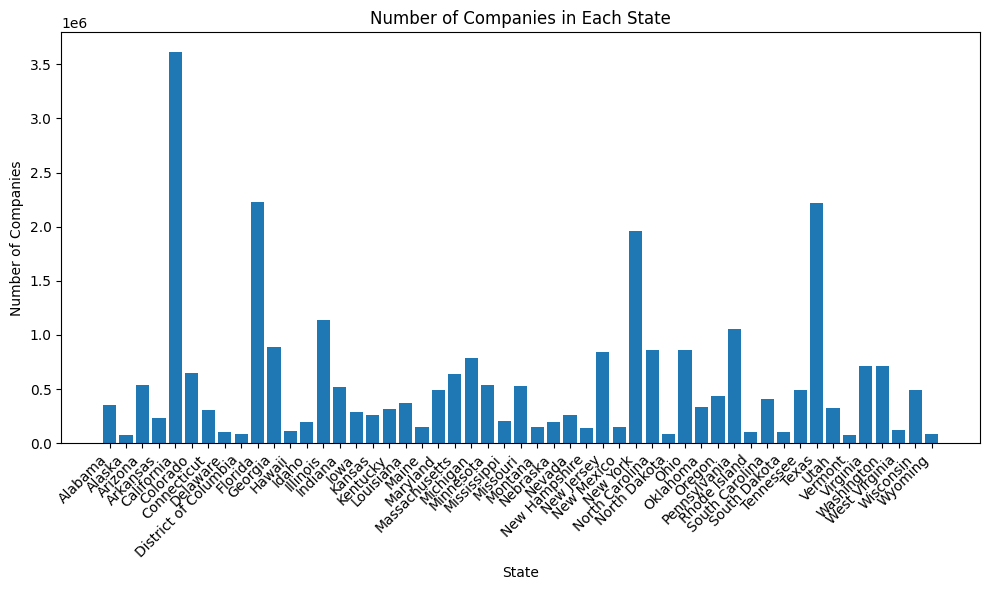

In [133]:
state_names = pd.Series(comp_num.index.tolist())
establishments = pd.Series(comp_num.tolist())

plt.figure(figsize=(10, 6))
plt.bar(state_names, establishments)
plt.xlabel('State')
plt.ylabel('Number of Companies')
plt.title('Number of Companies in Each State')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [134]:
fig = go.Figure(data=go.Choropleth(
    locations=comp_df['State Abbreviation'],
    z=comp_df['Establishments'],
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    marker_line_color='white',
    colorbar_title='Number of Companies'
))

fig.update_layout(
    title_text='Number of Companies in Each State',
    geo_scope='usa'
)


fig.show()


In [135]:
employment = pd.read_csv('employment.csv')

In [136]:
employment.drop(columns=['12-month percent change in employment', '12-month net change in employment (thousands)'], inplace=True)

In [137]:
def standardize(s):
    if ',' in s:
        s=s.replace(',', '')
    s=float(s)*1000
    return s

In [138]:
employment.rename(columns={'Total employment (thousands)': 'Total employment'}, inplace=True)
employment['Total employment']=employment['Total employment'].apply(standardize)

In [139]:
population=pd.read_csv('US population by states.csv')

In [140]:
def remove(s):
    if '.' in s:
        s=s.replace('.','')
    return s
population['States']=population['States'].apply(remove)

In [141]:
def standardize2(s):
    if ',' in s:
        s=s.replace(',','')
    s=float(s)
    return s
population['2020 Estimate Base']=population['2020 Estimate Base'].apply(standardize2)
population['2020']=population['2020'].apply(standardize2)
population['2021']=population['2021'].apply(standardize2)
population['2022']=population['2022'].apply(standardize2)
population['2023']=population['2023'].apply(standardize2)

In [142]:
employment_rate=pd.DataFrame()
employment_rate['State']=employment['State']
employment_rate['Total employment']=employment['Total employment']/population['2023']

In [143]:
employment_rate.drop(51, inplace=True)

In [144]:
# employment_rate['State Abbreviation'] = employment_rate['State'].map(state_abbr_map)
# employment_rate.drop(columns=['State'], inplace=True)
employment_rate

,State,Total employment
0,Alabama,0.424628
1,Alaska,0.449819
2,Arizona,0.429169
3,Arkansas,0.444172
4,California,0.466588
5,Colorado,0.495780
6,Connecticut,0.468819
7,Delaware,0.471368
8,District of Columbia,1.149090
9,Florida,0.436107


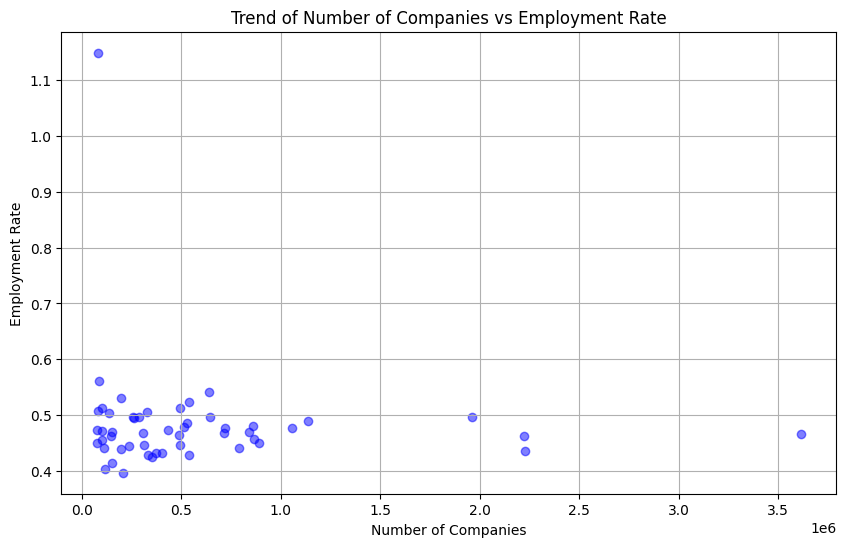

In [145]:
plt.figure(figsize=(10, 6))
plt.scatter(comp_df['Establishments'], employment_rate['Total employment'], color='blue', alpha=0.5)
plt.title('Trend of Number of Companies vs Employment Rate')
plt.xlabel('Number of Companies')
plt.ylabel('Employment Rate')
plt.grid(True)
plt.show()


## Two sample t test

In [146]:
correlation = comp_df['Establishments'].corr(employment_rate['Total employment'])

In [147]:
correlation

-0.1027584404990231

In [148]:
emp_data = employment_rate['Total employment']
comp_data = comp_df['Establishments']
emp_data.var(), comp_data.var()

(0.010248167042331753, 437253158635.35846)

In [149]:
stat, p_value = stats.ttest_ind(
   emp_data, 
   comp_data, 
   equal_var=False,
)
p_value

1.5282193847459958e-07

In [150]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the employment rate and number of companies.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the employment rate and number of companies.")

Reject the null hypothesis: There is a significant difference between the employment rate and number of companies.


In [151]:
cm = sms.CompareMeans(sms.DescrStatsW(emp_data), sms.DescrStatsW(comp_data))
conf_int = cm.tconfint_diff(alpha=0.01, alternative='two-sided', usevar='unequal')
print(f"99% CI for the difference in means: {conf_int}")

99% CI for the difference in means: (-812800.6483999824, -316907.1307449545)
